# Import library

In [31]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,accuracy_score
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
seed =45
% matplotlib inline

# Import data set

In [2]:
train = pd.read_csv('train.csv',na_values=-1)
test = pd.read_csv('test.csv',na_values=-1)

# Explore data set

In [3]:
print('Number rows and columns:',train.shape)
print('Number rows and columns:',test.shape)

train.head(3).T

Number rows and columns: (595212, 59)
Number rows and columns: (892816, 58)


,0,1,2
id,7.000000,9.000000,13.000000
target,0.000000,0.000000,0.000000
ps_ind_01,2.000000,1.000000,5.000000
ps_ind_02_cat,2.000000,1.000000,4.000000
ps_ind_03,5.000000,7.000000,9.000000
ps_ind_04_cat,1.000000,0.000000,1.000000
ps_ind_05_cat,0.000000,0.000000,0.000000
ps_ind_06_bin,0.000000,0.000000,0.000000
ps_ind_07_bin,1.000000,0.000000,0.000000
ps_ind_08_bin,0.000000,1.000000,1.000000


In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

# Traget varaiable

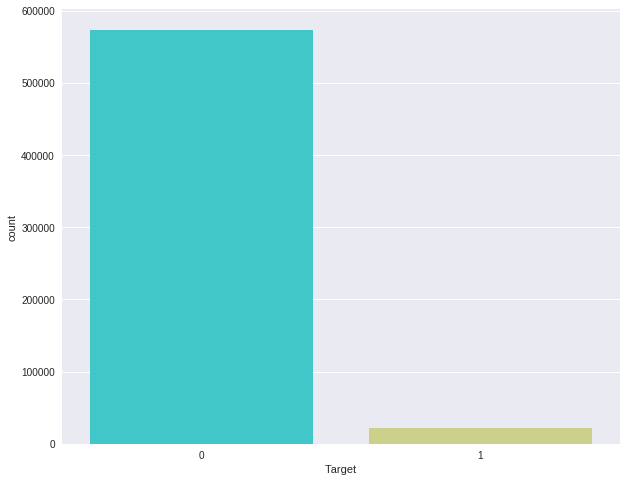

In [3]:
plt.figure(figsize=(10,8))
sns.countplot(train['target'],palette='rainbow')
plt.xlabel('Target')

The 'target' variable in imbalanced 

# CORELATION PLOT

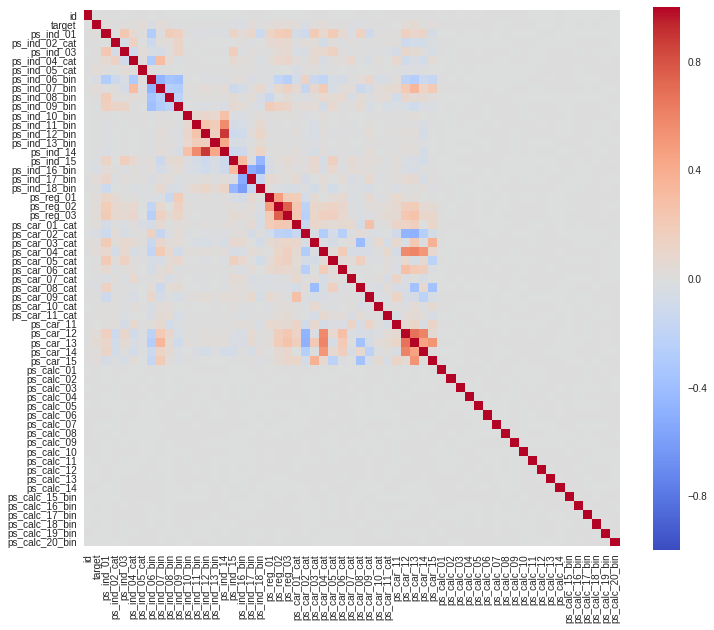

In [5]:
cor = train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,square =True,cmap='coolwarm')

In [4]:
""" ps_calc value as 0 relation with remaining varialble"""
ps_cal = train.columns[train.columns.str.startswith('ps_calc')] 
train = train.drop(ps_cal,axis =1)
test = test.drop(ps_cal,axis=1)

# Missing value is data set

"""Values of -1 indicate that the feature was missing from the observation. 
The target columns signifies whether or not a claim was filed for that policy holder.""

In [5]:
k= pd.DataFrame()
k['train']= train.isnull().sum()
k['test'] = test.isnull().sum()
k

,train,test
id,0,0.0
target,0,NaN
ps_ind_01,0,0.0
ps_ind_02_cat,216,307.0
ps_ind_03,0,0.0
ps_ind_04_cat,83,145.0
ps_ind_05_cat,5809,8710.0
ps_ind_06_bin,0,0.0
ps_ind_07_bin,0,0.0
ps_ind_08_bin,0,0.0


Missing value in test train data set are in same propotion and same column

In [5]:
def uniq(df):
    col = df.columns
    for i in col:
        print('\n Unique value of "{}" is "{}" '.format(i,df[i].nunique()))               
        #print(df[i].unique())
uniq(train)


 Unique value of "id" is "595212" 

 Unique value of "target" is "2" 

 Unique value of "ps_ind_01" is "8" 

 Unique value of "ps_ind_02_cat" is "4" 

 Unique value of "ps_ind_03" is "12" 

 Unique value of "ps_ind_04_cat" is "2" 

 Unique value of "ps_ind_05_cat" is "7" 

 Unique value of "ps_ind_06_bin" is "2" 

 Unique value of "ps_ind_07_bin" is "2" 

 Unique value of "ps_ind_08_bin" is "2" 

 Unique value of "ps_ind_09_bin" is "2" 

 Unique value of "ps_ind_10_bin" is "2" 

 Unique value of "ps_ind_11_bin" is "2" 

 Unique value of "ps_ind_12_bin" is "2" 

 Unique value of "ps_ind_13_bin" is "2" 

 Unique value of "ps_ind_14" is "5" 

 Unique value of "ps_ind_15" is "14" 

 Unique value of "ps_ind_16_bin" is "2" 

 Unique value of "ps_ind_17_bin" is "2" 

 Unique value of "ps_ind_18_bin" is "2" 

 Unique value of "ps_reg_01" is "10" 

 Unique value of "ps_reg_02" is "19" 

 Unique value of "ps_reg_03" is "5012" 

 Unique value of "ps_car_01_cat" is "12" 

 Unique value of "ps_car

The unique value of "ps_car_11_cat" is maximum in the data set is 104

# Covert int/float varaible into category data

In [6]:
def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=104:
            df[i] = df[i].astype('category')
category_type(train)
category_type(test)

# Univariate analysis

In [23]:
cat_col = [col for col in train.columns if '_cat' in col]
print(cat_col)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


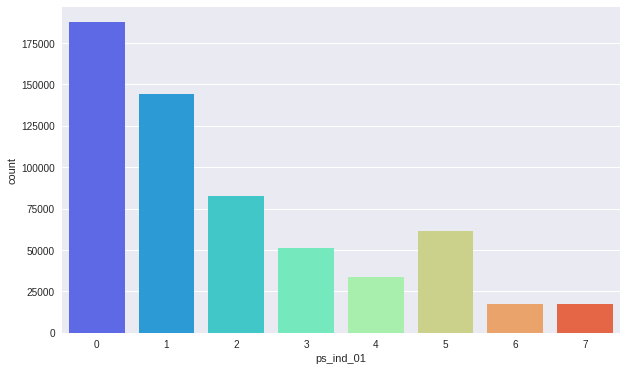

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(train['ps_ind_01'],palette='rainbow')


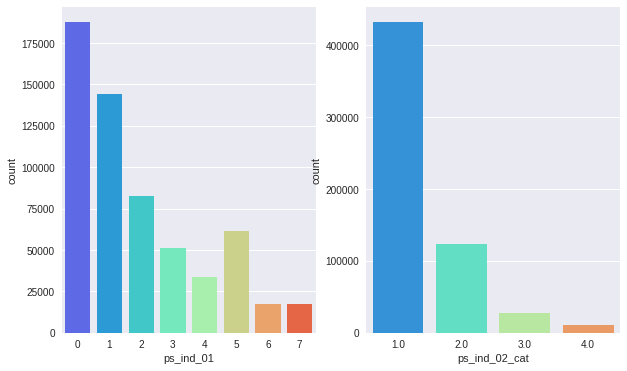

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(train['ps_ind_01'],palette='rainbow')
plt.subplot(122)
sns.countplot(train['ps_ind_02_cat'],palette='rainbow')

# One Hot Encoding

In [7]:
def OHE(df):
    cat_col = df.select_dtypes(include =['category']).columns
    
    c2,c3 = [],{}
    
    print('Categorical feature',len(cat_col))
    for c in cat_col:
        if df[c].nunique()>2 :
            c2.append(c)
            c3[c] = 'ohe_'+c
    
    df = pd.get_dummies(df, prefix=c3, columns=c2,drop_first=True,dummy_na=True)

    #df = df.drop(c2,axis=1)
    print(df.shape)
    return df

In [19]:
train1 = OHE(train)
test1 = OHE(test)

Categorical feature 34
(595212, 273)
Categorical feature 33
(892816, 272)


# Replace missing value in numeric columns

In [20]:
def missing_value(df):
    col = df.columns
    for i in col:
        if df[i].isnull().sum()>0:
            df[i].fillna(df[i].mode()[0],inplace=True)

In [10]:
missing_value(train1)
missing_value(test1)

In [32]:
#unwanted = train1.columns[(train1.nunique() >2) & (train1.nunique() <=104)]
unwanted = train1.select_dtypes(include =['category']).columns
print(unwanted)
#train1.drop(unwanted,inplace=True,axis=1)
#test1.drop(unwanted,inplace=True,axis=1)

Index(['target', 'ps_ind_04_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin',
       'ps_ind_18_bin', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat',
       'ps_car_07_cat', 'ps_car_08_cat'],
      dtype='object')


# Split data set

In [12]:
X = train1.drop(['target','id'],axis=1)
y = train1['target']
x_test = test1.drop('id',axis=1)
del train1,test1

# Model

Logistic regression is used for modelling. The data set is split using Stratified Kfold. In each split model is created and predicted using that model. The final predicted value is average of all model. 

In [14]:
kf = StratifiedKFold(n_splits=2,random_state=seed,shuffle=True)
pred_test_full=0
cv_score=[]
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    lr = LogisticRegression(class_weight='balanced')
    lr.fit(xtr,ytr)
    pred_test = lr.predict_proba(xvl)[:,1]    
    cv_score.append(roc_auc_score(yvl,pred_test))
    pred_test_full += lr.predict_proba(x_test)[:,1]
    i+=1


1 of kfold 2

2 of kfold 2


In [15]:
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

Cv [0.63203415821324338, 0.63432040558393532] 
Mean cv Score 0.633177281899


# Predict for unsen data set

In [16]:
y_pred = pred_test_full/2
submit = pd.DataFrame({'id':test['id'],'target':y_pred})
#submit.to_csv('lr_porto.csv',index=False)
submit.to_csv('lr_porto.csv.gz',index=False,compression='gzip') 

In [17]:
submit.head()

,id,target
0,0,0.442351
1,1,0.478807
2,2,0.365747
3,3,0.316596
4,4,0.508837


In [ ]:
# Light GBM model
def runLGB(train,valid,y_train,y_valid,test,eta=0.5,num_rounds=10,early_stopping_rounds=50,sample=0.7,
           col_sample=0.8,max_depth=7):
    
    param = {
            'objective':'binary',
            'boosting':'gbdt',
            'learning_rate':eta,
            #'metric':'gini',
            'metric':'auc',
            'bagging_fraction':sample,
            'bagging_freq':5,
            'bagging_seed':seed,
            'num_leaves':120,
            'feature_fraction':col_sample,
            'verbose':10,            
            'min_child_weight':10,
            'max_depth':max_depth,
            'nthread':-1           
            }
   
    lgtrain = lgb.Dataset(train,label=y_train)
    lgvalid = lgb.Dataset(valid,label=y_valid)
    
    model=lgb.train(param,lgtrain,num_rounds,valid_sets=lgvalid,
              early_stopping_rounds=early_stopping_rounds)
    #lg_pred = model.predict(xvl,num_iteration=model.best_iteration)
    pred = model.predict(test,num_iteration=model.best_iteration)
    
    return pred,model

#Kfold
kf = StratifiedKFold(n_splits =2,random_state=seed,shuffle=True)
pred_test_full=0
for train_index,test_index in kf.split(X,y):
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y.loc[train_index], y.loc[test_index]
    
    pred_test,model = runLGB(xtr,xvl,ytr,yvl,x_test,eta=0.01,num_rounds=1000,max_depth=10)
    pred_test_full +=pred_test

[1]	valid_0's auc: 0.596635
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.609229
[3]	valid_0's auc: 0.612128
[4]	valid_0's auc: 0.612676
[5]	valid_0's auc: 0.612785
[6]	valid_0's auc: 0.615875
[7]	valid_0's auc: 0.616347
[8]	valid_0's auc: 0.616687
[9]	valid_0's auc: 0.616439
[10]	valid_0's auc: 0.615952
[11]	valid_0's auc: 0.616745
[12]	valid_0's auc: 0.617242
[13]	valid_0's auc: 0.617873
[14]	valid_0's auc: 0.617902
[15]	valid_0's auc: 0.617905
[16]	valid_0's auc: 0.617702
[17]	valid_0's auc: 0.617514
[18]	valid_0's auc: 0.617475
[19]	valid_0's auc: 0.617339
[20]	valid_0's auc: 0.617237
[21]	valid_0's auc: 0.61819
[22]	valid_0's auc: 0.61838
[23]	valid_0's auc: 0.618454
[24]	valid_0's auc: 0.6189
[25]	valid_0's auc: 0.618973
[26]	valid_0's auc: 0.618988
[27]	valid_0's auc: 0.618986
[28]	valid_0's auc: 0.619251
[29]	valid_0's auc: 0.619175
[30]	valid_0's auc: 0.619486
[31]	valid_0's auc: 0.619615
[32]	valid_0's auc: 0.620038
[33]	valid_0's auc: 0.6

[278]	valid_0's auc: 0.626131
[279]	valid_0's auc: 0.626218
[280]	valid_0's auc: 0.62626
[281]	valid_0's auc: 0.626201
[282]	valid_0's auc: 0.626214
[283]	valid_0's auc: 0.626226
[284]	valid_0's auc: 0.626239
[285]	valid_0's auc: 0.626262
[286]	valid_0's auc: 0.626406
[287]	valid_0's auc: 0.626439
[288]	valid_0's auc: 0.626494
[289]	valid_0's auc: 0.626589
[290]	valid_0's auc: 0.626642
[291]	valid_0's auc: 0.626704
[292]	valid_0's auc: 0.626745
[293]	valid_0's auc: 0.626794
[294]	valid_0's auc: 0.626818
[295]	valid_0's auc: 0.626889
[296]	valid_0's auc: 0.626877
[297]	valid_0's auc: 0.626886
[298]	valid_0's auc: 0.626976
[299]	valid_0's auc: 0.626967
[300]	valid_0's auc: 0.626983
[301]	valid_0's auc: 0.627046
[302]	valid_0's auc: 0.62708
[303]	valid_0's auc: 0.627135
[304]	valid_0's auc: 0.627183
[305]	valid_0's auc: 0.627311
[306]	valid_0's auc: 0.627327
[307]	valid_0's auc: 0.627359
[308]	valid_0's auc: 0.627336
[309]	valid_0's auc: 0.627377
[310]	valid_0's auc: 0.627348
[311]	valid_

[553]	valid_0's auc: 0.632156
[554]	valid_0's auc: 0.632161
[555]	valid_0's auc: 0.632164
[556]	valid_0's auc: 0.632175
[557]	valid_0's auc: 0.632179
[558]	valid_0's auc: 0.632213
[559]	valid_0's auc: 0.632212
[560]	valid_0's auc: 0.632215
[561]	valid_0's auc: 0.632259
[562]	valid_0's auc: 0.632264
[563]	valid_0's auc: 0.632286
[564]	valid_0's auc: 0.632306
[565]	valid_0's auc: 0.632326
[566]	valid_0's auc: 0.632349
[567]	valid_0's auc: 0.632386
[568]	valid_0's auc: 0.632408
[569]	valid_0's auc: 0.632441
[570]	valid_0's auc: 0.632478
[571]	valid_0's auc: 0.63252
[572]	valid_0's auc: 0.632563
[573]	valid_0's auc: 0.632586
[574]	valid_0's auc: 0.632602
[575]	valid_0's auc: 0.632589
[576]	valid_0's auc: 0.632619
[577]	valid_0's auc: 0.632637
[578]	valid_0's auc: 0.632655
[579]	valid_0's auc: 0.632655
[580]	valid_0's auc: 0.632668
[581]	valid_0's auc: 0.632692
[582]	valid_0's auc: 0.63271
[583]	valid_0's auc: 0.632738
[584]	valid_0's auc: 0.632749
[585]	valid_0's auc: 0.632757
[586]	valid_

[46]	valid_0's auc: 0.625079
[47]	valid_0's auc: 0.625122
[48]	valid_0's auc: 0.625073
[49]	valid_0's auc: 0.625023
[50]	valid_0's auc: 0.625113
[51]	valid_0's auc: 0.625142
[52]	valid_0's auc: 0.625024
[53]	valid_0's auc: 0.625119
[54]	valid_0's auc: 0.625079
[55]	valid_0's auc: 0.625269
[56]	valid_0's auc: 0.625285
[57]	valid_0's auc: 0.62522
[58]	valid_0's auc: 0.625357
[59]	valid_0's auc: 0.625379
[60]	valid_0's auc: 0.625324
[61]	valid_0's auc: 0.625372
[62]	valid_0's auc: 0.62551
[63]	valid_0's auc: 0.625649
[64]	valid_0's auc: 0.625676
[65]	valid_0's auc: 0.625617
[66]	valid_0's auc: 0.625637
[67]	valid_0's auc: 0.62569
[68]	valid_0's auc: 0.625739
[69]	valid_0's auc: 0.625767
[70]	valid_0's auc: 0.62575
[71]	valid_0's auc: 0.625855
[72]	valid_0's auc: 0.625845
[73]	valid_0's auc: 0.625847
[74]	valid_0's auc: 0.625836
[75]	valid_0's auc: 0.625849
[76]	valid_0's auc: 0.625874
[77]	valid_0's auc: 0.625847
[78]	valid_0's auc: 0.625895
[79]	valid_0's auc: 0.625965
[80]	valid_0's auc

# Thank you for visiting